### Jupyter com transcrições e observações sobre o artigo da [Medium](https://medium.com/) sobre K-Means.

<a href="https://medium.com/@paulo_sampaio/entendendo-k-means-agrupando-dados-e-tirando-camisas-e90ae3157c17">Entendendo k-Means, agrupando dados e tirando camisas</a>

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import scale
seaborn.set()
%matplotlib inline

In [4]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
del data["Channel"]
del data["Region"]
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [22]:
data.columns = ["fresco", "leite", "mercearia", "congelado", "detergentes-papel", "delicatesse", "clusters"]
data.head()

,fresco,leite,mercearia,congelado,detergentes-papel,delicatesse,clusters
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,0


In [23]:
data.describe()

,fresco,leite,mercearia,congelado,detergentes-papel,delicatesse,clusters
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,1.018182
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,0.795567
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,0.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,1.000000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,1.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,1.000000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,4.000000


In [24]:
data_array = data.values
data_array

array([[12669,  9656,  7561, ...,  2674,  1338,     1],
       [ 7057,  9810,  9568, ...,  3293,  1776,     1],
       [ 6353,  8808,  7684, ...,  3516,  7844,     1],
       ...,
       [14531, 15488, 30243, ..., 14841,  1867,     2],
       [10290,  1981,  2232, ...,   168,  2125,     1],
       [ 2787,  1698,  2510, ...,   477,    52,     1]], dtype=int64)

### Método do Cotovelo para Definir o número de Clusters

In [29]:
inercia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1234)
    kmeans.fit(data)
    inercia.append((i, kmeans.inertia_))
inercia

[(1, 157595857443.46362),
 (2, 113217528797.83344),
 (3, 80332414038.75424),
 (4, 64855545694.00127),
 (5, 53056232068.75724),
 (6, 46754537171.74008),
 (7, 41460974377.95915),
 (8, 36275549256.565414),
 (9, 32774539165.532646),
 (10, 30009876914.99861)]

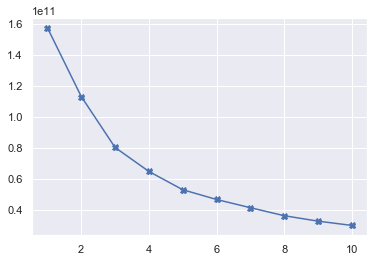

In [30]:
plt.plot([w[0] for w in inercia], [w[1] for w in inercia], marker="X")

O mellhor número pode ser o 5, mas existem melhores formas de observar o número que não seja pelo olhômetro.

In [25]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=1234)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

In [26]:
data["clusters"] = kmeans.fit_predict(data_array)
data.head()

,fresco,leite,mercearia,congelado,detergentes-papel,delicatesse,clusters
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,0


Text(0.5, 1.0, 'Gastos por Cluster')

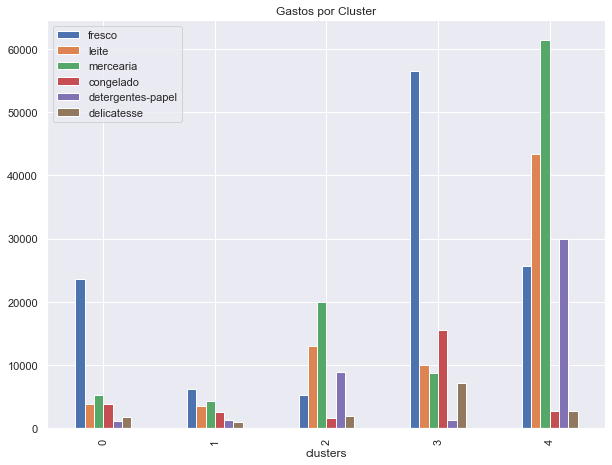

In [28]:
data.groupby("clusters").mean().plot.bar(figsize=(10,7.5))
plt.title("Gastos por Cluster")